<a href="https://colab.research.google.com/github/rakenputra/machine-learning/blob/main/Week%204/Data_Visualization_KC_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#  membaca dataset CSV
path_to_dataset = '/content/drive/My Drive/Dataset/kc_house_data.csv'
dataset = pd.read_csv(path_to_dataset)
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


Memeriksa jumlah nilai unik (unique values) pada setiap fitur (feature) dalam dataset adalah langkah yang baik sebelum melakukan visualisasi data. Hal ini dapat memberikan pemahaman awal tentang jenis data yang ada, membantu mengidentifikasi variabel kategorikal, dan memberikan wawasan awal tentang keberagaman nilai dalam setiap fitur.

In [ ]:
# Mendapatkan jumlah nilai unik untuk setiap fitur
unique_counts = dataset.nunique()

# Menampilkan jumlah nilai unik
print(unique_counts)


id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


memisahkan numerical dan categorical feature dapat membantu untuk melakukan eskpolari data dan dapat membantu bagaimana data dapat di visualisasikan

In [ ]:
# Memisahkan fitur numerik dan kategorikal
numerical_features = dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_features = dataset.select_dtypes(include=['object']).columns

# Menampilkan jenis fitur
print("Numerical Features:")
print(numerical_features)

print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Categorical Features:
Index(['date'], dtype='object')


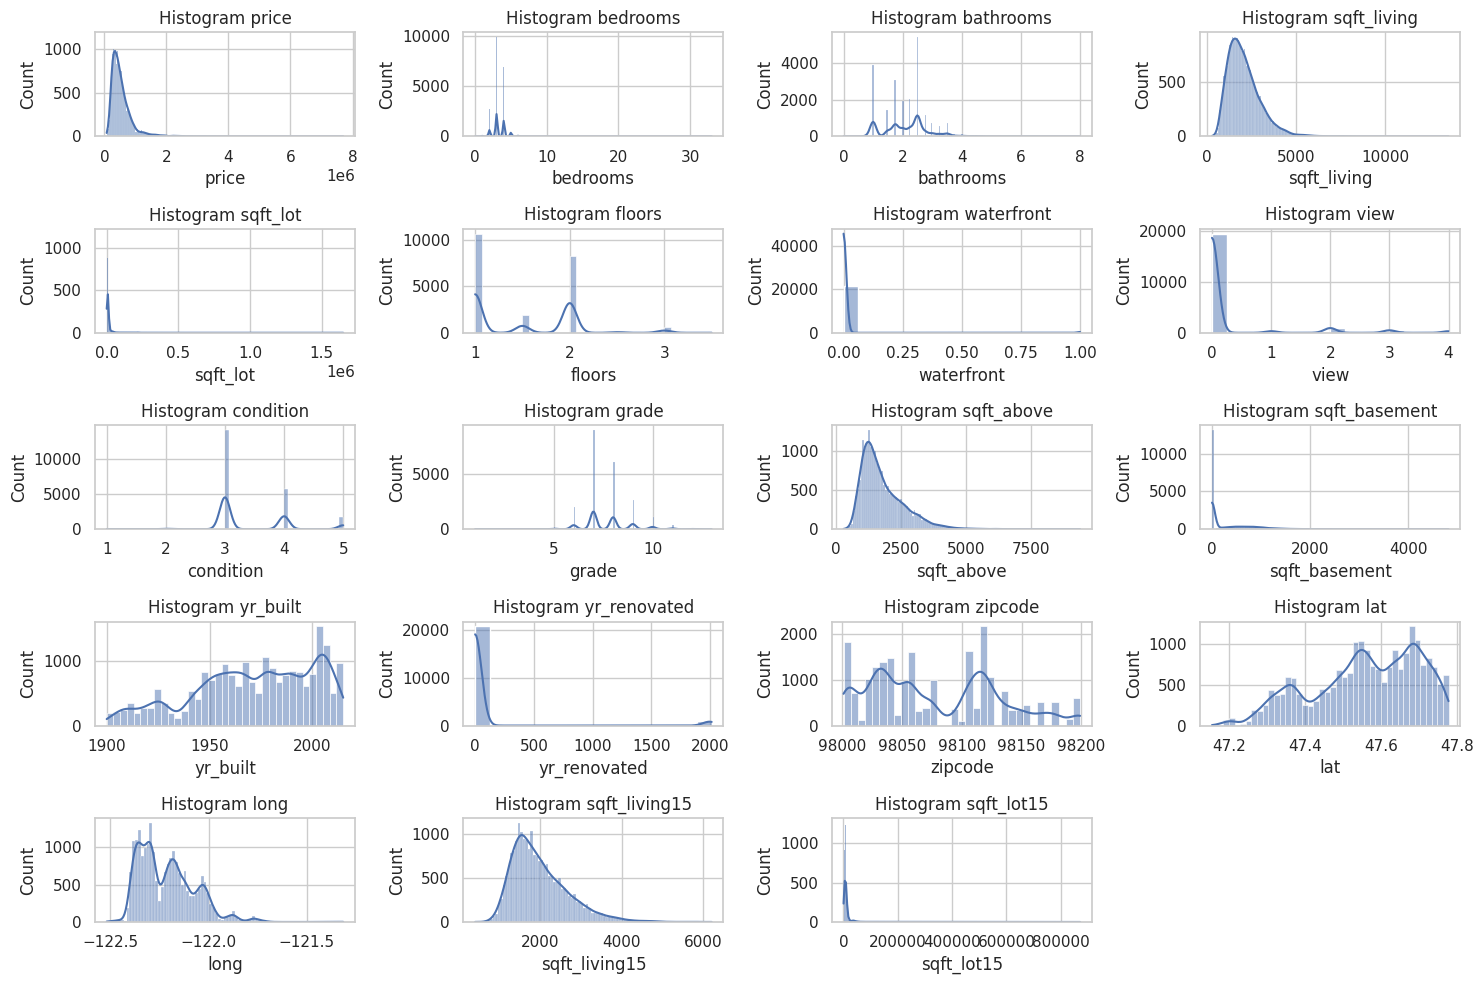

In [ ]:
# Set style
sns.set(style="whitegrid")

# Visualisasi untuk Numerical Features
numerical_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
                       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Histogram untuk Variabel Numerik
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 4, i)
    sns.histplot(dataset[feature], kde=True)
    plt.title(f'Histogram {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


Melihat histogram antara tahun dibuat dan harga

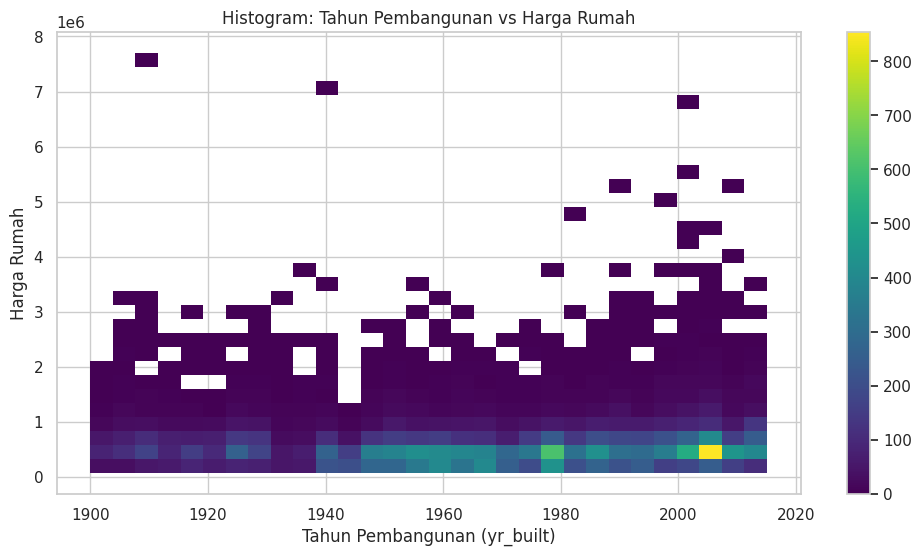

In [ ]:
x_data = dataset['yr_built']
y_data = dataset['price']

# Visualisasi histogram dengan Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(x=x_data, y=y_data, bins=30, cbar=True, cmap='viridis')
plt.xlabel('Tahun Pembangunan (yr_built)')
plt.ylabel('Harga Rumah')
plt.title('Histogram: Tahun Pembangunan vs Harga Rumah')
plt.show()

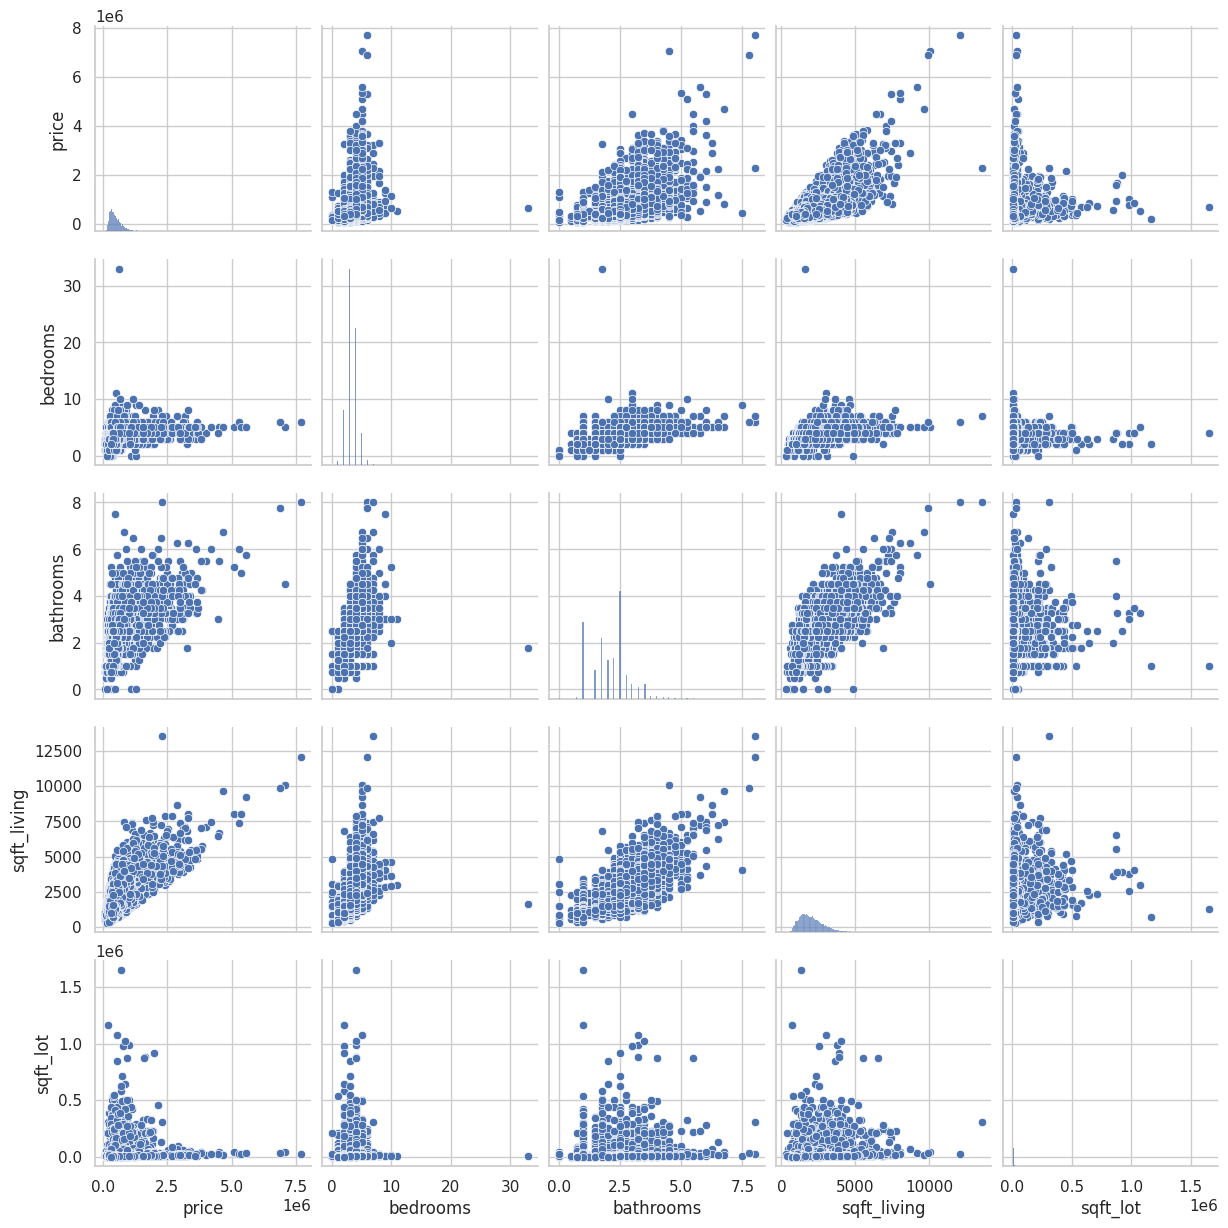

In [ ]:
sns.pairplot(dataset[numerical_features[:5]])
plt.show()

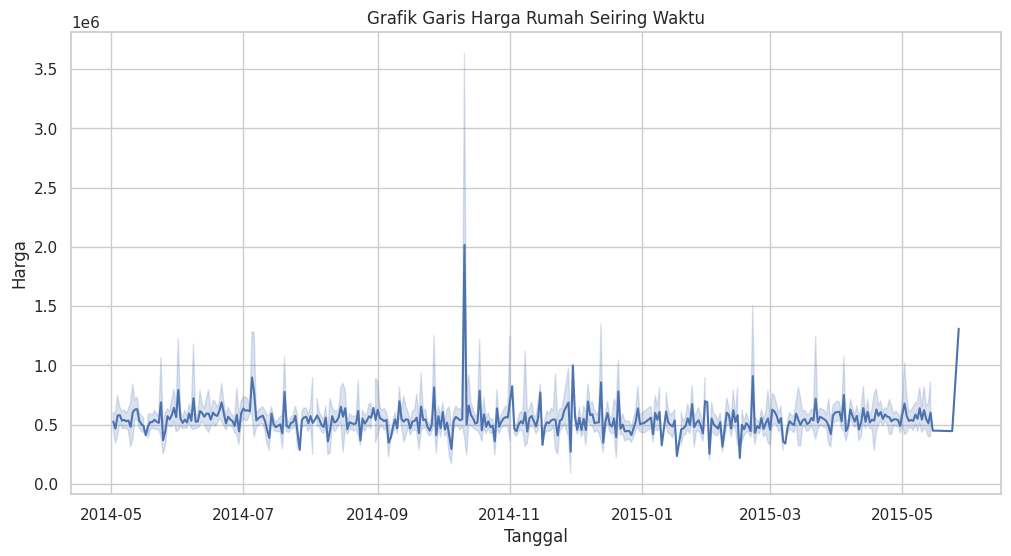

In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'])
time_series_data = dataset.set_index('date')['price']
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_series_data)
plt.title('Grafik Garis Harga Rumah Seiring Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.show()

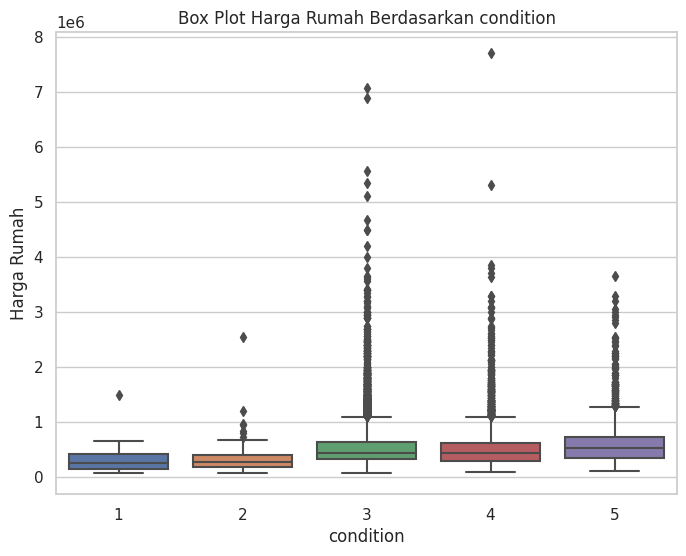

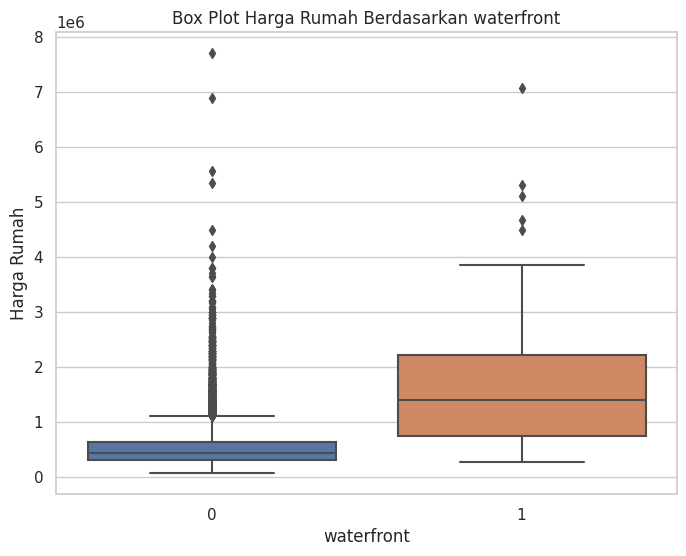

In [ ]:
# Categorical Features
categorical_features = ['condition', 'waterfront']  # Tambahkan fitur kategorikal lain jika ada

# Set style
sns.set(style="whitegrid")

# Membuat box plot untuk setiap fitur kategorikal
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature, y='price', data=dataset)
    plt.title(f'Box Plot Harga Rumah Berdasarkan {feature}')
    plt.xlabel(feature)
    plt.ylabel('Harga Rumah')
    plt.show()

<ipython-input-12-3031054929de>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


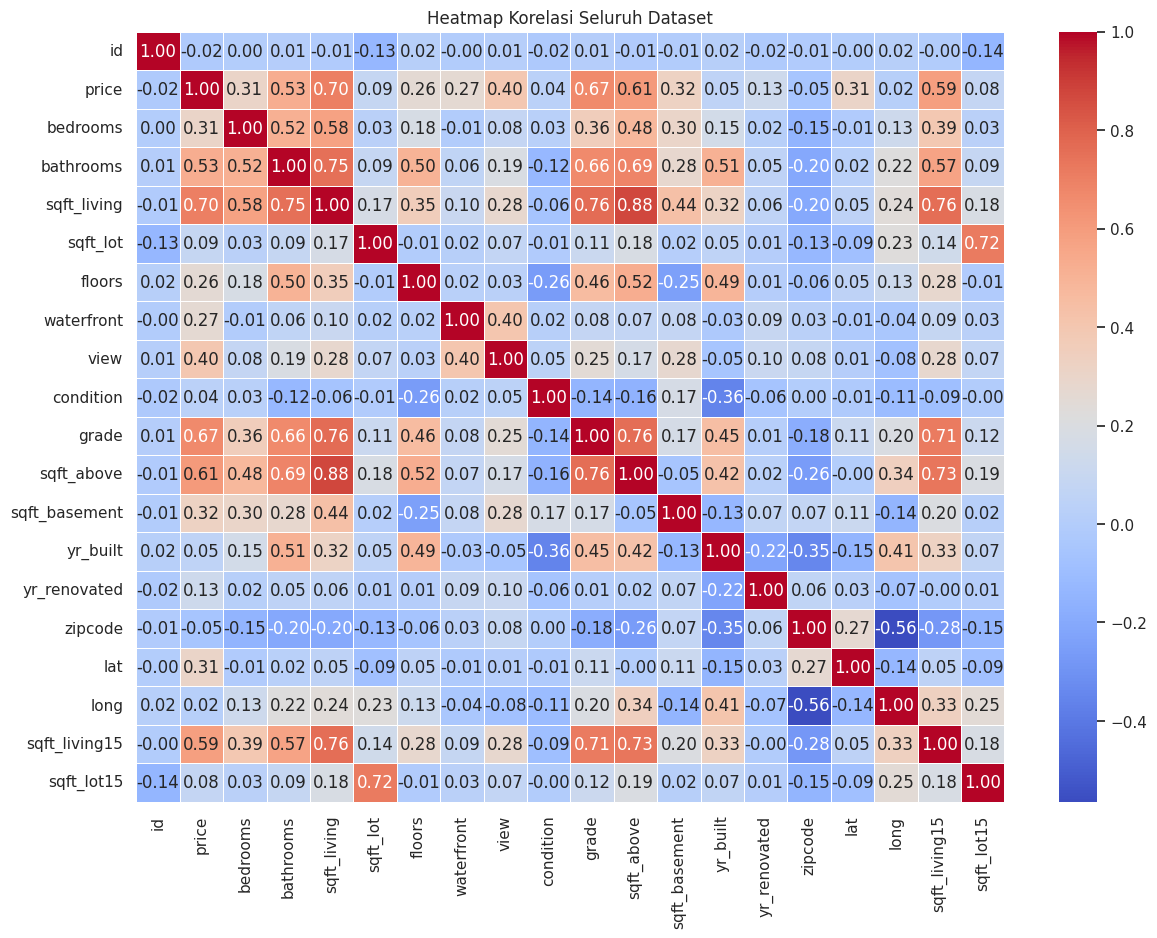

In [ ]:
correlation_matrix = dataset.corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Seluruh Dataset')
plt.show()